In [2]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [4]:
fname = "2022_Feb_week4_OC_diagram.out"        #open data file and read
data = np.genfromtxt(fname,autostrip=True)
x1 = data[:,0] - 2400000                
y1 = data[:,4]             
dy1 = data[:,5]   

In [5]:
K = 33.7        #m/s
P = 10220       #days
e = 0.39               #No-unit
w = -1.36           #rad
tau = 53025     #days

In [6]:
from scipy.optimize import fsolve
from scipy.optimize import curve_fit

In [7]:
def TAno(P,tau,e,t):
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    return f

In [8]:
def keplerian_fit(t,K,P,e,w,tau):
    f = TAno(P,tau,e,t)
    return K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))

In [15]:
import scipy.optimize as optimization  
guess = (K,P,e,w,tau)
params, params_covariance = optimization.curve_fit(keplerian_fit, x1, y1,sigma=dy1, absolute_sigma=True,p0=guess)

K = params[0]
P = params[1]
e = params[2]
w = params[3]
tau = params[4]


dK = params_covariance[0,0]
dP = params_covariance[1,1]
de = params_covariance[2,2]
dw = params_covariance[3,3]
dtau = params_covariance[4,4]

ocfit = keplerian_fit(x1,K,P,e,w,tau)
print(ocfit)

x_min, x_max = np.amin(x1), np.amax(x1)
x_line = np.linspace(x_min, x_max)
y_line = keplerian_fit(x_line, *params)

if e<0:
    w -= np.pi
    e *= -1
    w_deg = w*180/np.pi
    print(K,P,e,w,w_deg,tau)


print("The parameters of egress part")
print("K =", K, "+/-", dK**0.5)
print("P =", P, "+/-", dP**0.5)
print("e =", e, "+/-", de**0.5)
print("w =", w, "+/-", dw**0.5)
print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi))
print("tau =", tau, "+/-", dtau**0.5)

[ -5.09610811  -5.0948005   -5.09349309  10.68619403  10.70539035
  10.7066748   10.91162646  11.21734794  11.21862903  11.21992323
  11.77004986  11.79043979  11.85032037  25.42699162  25.98323122
  27.53765326  30.75347994  31.23988818  31.24082754  28.32170594
  23.43126263  23.40684711  13.76107701  13.59008274  13.58832196
  13.5865535   13.56184808  13.56008513  13.55832526  13.55655461
 -48.13259317 -48.1336129  -50.4826224  -50.48262224 -50.48282416
 -26.98327182 -26.98215089 -26.94740284 -26.89581183 -26.87673608
 -26.84306122 -26.8419387  -26.84081615 -26.83969341 -26.56973128
 -26.56860427 -26.55282594 -26.55169957 -26.51787734 -26.51674973
 -26.51562193 -26.51449356 -26.49757672 -26.49644881 -26.48178387
 -26.47952738 -26.47839902 -26.47727064 -26.46260198 -26.46147373
 -26.46034527 -25.97353926 -25.97240326 -25.55335377 -25.46196302
 -25.33384278 -22.90701139 -22.51073127 -22.50954986 -22.49182002
 -22.47172304 -22.4350648  -22.43388209 -22.41613905 -22.41495574
 -22.39720

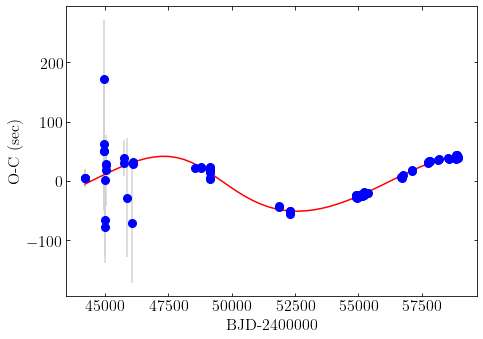

In [16]:
N_BMJD = 2400000
#print(phase)
#fig,ax = plt.subplots()
fig=plt.figure(figsize=(7, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#plt.errorbar(x,y,dy,fmt='ok')
plt.errorbar(x1, y1, yerr= dy1, fmt='o', markersize=8, color='blue', ecolor='lightgray')
plt.plot(x_line,y_line,'-r')
#plt.title('phased RV data for 51 Peg b')
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.show()

In [25]:
N = 600
x_range = [i for i in range(N)]
x_range_a = [i for i in range(N)]
y_range = [i for i in range(len(x_range))]
step=1*100
#step

interporate = []
for i in range(400, N):
    x_range[i] = i*step
    y_range[i] = keplerian_fit(x_range[i], *params)
    print(x_range[i], y_range[i])
    interporate.append('%0.0f %0.2f %0.5f' %(i, x_range[i], y_range[i]))
    
data_out = interporate
f = open("interporate.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

40000 [-47.57900908]
40100 [-48.41451428]
40200 [-49.12751643]
40300 [-49.71973766]
40400 [-50.19308383]
40500 [-50.54961669]
40600 [-50.79152953]
40700 [-50.92112578]
40800 [-50.94080047]
40900 [-50.85302424]
41000 [-50.66032947]
41100 [-50.36529865]
41200 [-49.97055431]
41300 [-49.47875078]
41400 [-48.89256723]
41500 [-48.21470203]
41600 [-47.44786828]
41700 [-46.59479026]
41800 [-45.65820081]
41900 [-44.64083951]
42000 [-43.54545156]
42100 [-42.37478722]
42200 [-41.13160192]
42300 [-39.81865676]
42400 [-38.43871957]
42500 [-36.99456627]
42600 [-35.48898272]
42700 [-33.92476683]
42800 [-32.304731]
42900 [-30.63170491]
43000 [-28.90853854]
43100 [-27.13810548]
43200 [-25.32330649]
43300 [-23.46707331]
43400 [-21.57237271]
43500 [-19.64221078]
43600 [-17.67963746]
43700 [-15.68775128]
43800 [-13.66970438]
43900 [-11.62870769]
44000 [-9.56803639]
44100 [-7.49103557]
44200 [-5.40112614]
44300 [-3.3018109]
44400 [-1.19668087]
44500 [0.91057821]
44600 [3.0161792]
44700 [5.11622675]
44800 [

In [26]:
InputFile_out = "interporate.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_range = Data_out[:,1]
y_range = Data_out[:,2]

#print(y_range)

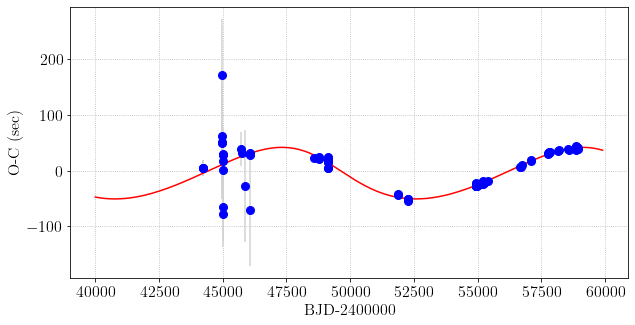

In [27]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x1, y1, yerr= dy1, fmt='o', markersize=8, color='blue', ecolor='lightgray')
# create a line plot for the mapping function
plt.plot(x_range, y_range, '-', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()